## Semi-Supervised Learning -- Examples

* Examples modified from: https://scikit-learn.org/stable/modules/label_propagation.html#label-propagation

We have primarily dealt with **supervised** learning problems. In our data sets, every instance of the data set is clearly labelled with a target value (a class label in the case of classification, or a real value in the case of regression). We also dealt briefly with **unsupervised** learning, where the data instances are not labelled. In that context, the primary algorithm we examined was *k-means clustering*. 

In **semi-supervised** learning, we have a *mixture of labelled and unlabelled data*. 

This is a realistic scenario, in the sense that labelling data is very time-consuming but collecting unlabelled data is comparatively easy, and so it's often the case with real world data sets that only a small percentage of it will  be labelled. 

In a semi-supervised learner, both the labelled and unlabelled data are used in training. Many learning schemes are iterative, and a measure of similarity with labelled data is used to produce labels for the unlabelled data.  

E.g., a simple scheme (somewhat underspecified) is given below: 

```
10 Train model M on labelled data.
20 Use M to label unlabelled data (with probability scores). 
30 Add most confidently labelled instances to the labelled data.
40 GOTO 10
```
One can imagine many possible variations of this. We could represent the data set as a graph (where the connections indicate similarity) with only a subset of nodes are labelled. Working in an iterative fashion, we can label other nodes based upon their neighbors. There are lots of ways this could be implemented. 

Scikit-learn defines two semi-supervised learning estimators:

*  [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html)
*  [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html)

Both allow `knn` or `rbf` (radial basis function) to be used to measure similarity. There are other parameters that can be specified.  E.g., for `knn`, the number of neighbors can be specified. 

In `LabelSpreading` a clamping factor $\alpha$ can also be specified:``A value in (0, 1) that specifies the relative amount that an instance should adopt the information from its neighbors as opposed to its initial label. alpha=0 means keeping the initial label information; alpha=1 means replacing all initial information.''

* *See Also*: Label Propagation and Quadratic Criterion, Yoshua Bengio, Olivier Delalleau, Nicolas Le Roux. In *Semi-Supervised Learning*, Chapelle et al. (editors).

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import accuracy_score
import math
from sklearn.preprocessing import StandardScaler

# load the data set
dataset = datasets.load_iris()
dataset = datasets.load_breast_cancer()

datasetIn = dataset.data
datasetTarget = dataset.target

def unlabel(x_in, y_in, percent=0.33, scaled = True):
    # copy inputs and targets
    x = np.copy(x_in)
    if scaled:
        sk = StandardScaler()
        x = sk.fit_transform(x)
    y = np.copy(y_in)
    y_len = len(y)
    pos = math.floor(y_len*percent)
    # scramble inputs
    indexes =   np.arange(len(y))
    np.random.shuffle(indexes)
    x = x[indexes]
    y = y[indexes]
    y_orig = np.copy(y)
    y[0:pos] = -1
    return x,y,y_orig

def summarize(datasetIn, datasetTarget, percent=0.33, scaled=True):
    x,y,y_raw = unlabel(datasetIn,datasetTarget,percent=percent, scaled=scaled)
    ls = label_propagation.LabelSpreading(kernel='knn')
    ls.fit(x, y)
    preds = ls.predict(x)

    print("Accuracy by instance,  90% unlabeled")
    print("N\tUnlab\tLab\tPred\tCorrect")

    for i,yi,y_rawi,predi in zip(range(len(x)),y,y_raw,preds):
        print(f"{i}\t{yi}\t{y_rawi}\t{predi}\t{predi==y_rawi}")

    print('-'*40)
    print('N\tPER\tACC')
    print(f'{len(x)}\t{percent}\t{accuracy_score(preds,y_raw)}')

C:\Users\nimda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
print("Accuracy by % unlabeled")
for per in [0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]:
    x,y,y_raw = unlabel(datasetIn,datasetTarget,percent=per, scaled=True)
    ls = label_propagation.LabelSpreading(kernel='knn')
    ls.fit(x, y)
    preds = ls.predict(x)
    print(f'{len(x)}\t{per}\t{accuracy_score(preds,y_raw)}')

print('-'*40)
per = 0.9
summarize(datasetIn,datasetTarget,percent=per, scaled=True)

Accuracy by % unlabeled
569	0.1	0.9718804920913884
569	0.25	0.9666080843585237
569	0.5	0.968365553602812
569	0.75	0.9648506151142355
569	0.8	0.9560632688927944
569	0.9	0.9666080843585237
569	0.95	0.961335676625659
569	0.99	0.8840070298769771
----------------------------------------
Accuracy by instance,  90% unlabeled
N	Unlab	Lab	Pred	Correct
0	-1	1	1	True
1	-1	1	1	True
2	-1	1	1	True
3	-1	1	1	True
4	-1	1	1	True
5	-1	0	1	False
6	-1	1	1	True
7	-1	1	1	True
8	-1	1	1	True
9	-1	0	0	True
10	-1	0	0	True
11	-1	1	1	True
12	-1	1	1	True
13	-1	1	0	False
14	-1	1	1	True
15	-1	0	1	False
16	-1	0	0	True
17	-1	0	0	True
18	-1	0	1	False
19	-1	1	1	True
20	-1	1	1	True
21	-1	1	1	True
22	-1	1	1	True
23	-1	1	1	True
24	-1	0	0	True
25	-1	1	1	True
26	-1	0	0	True
27	-1	1	1	True
28	-1	1	1	True
29	-1	0	0	True
30	-1	1	1	True
31	-1	0	0	True
32	-1	1	1	True
33	-1	0	0	True
34	-1	0	0	True
35	-1	1	1	True
36	-1	0	0	True
37	-1	1	1	True
38	-1	1	1	True
39	-1	1	1	True
40	-1	1	1	True
41	-1	0	0	True
42	-1	1	1	True
43	-1	0	0	True
4

### Example

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py

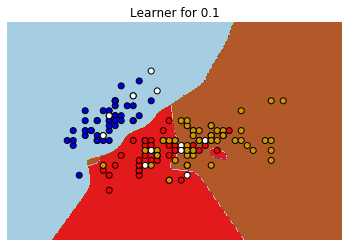

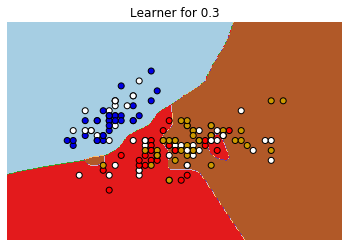

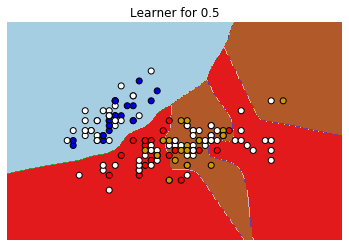

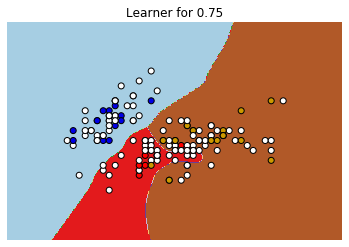

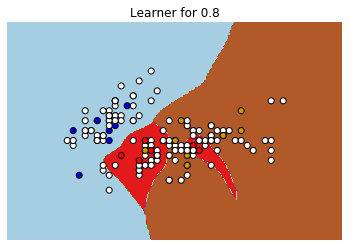

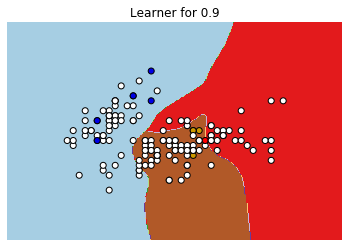

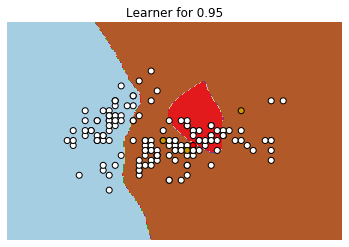

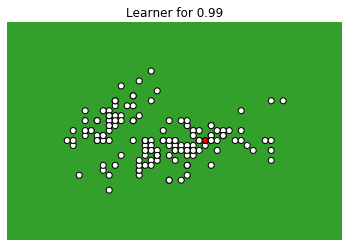

In [3]:
# Modified from : Clay Woolam <clay@woolam.org>
# License: BSD
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

rng = np.random.RandomState(0)

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = .02
learners=[]

for per in [0.1, 0.3, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]:
    y_temp = np.copy(y)
    y_temp[rng.rand(len(y)) < per] = -1
    lstemp = (label_propagation.LabelSpreading(kernel = 'rbf', max_iter=100, alpha=0.01).fit(X, y_temp),
        y_temp,f'Learner for {per}')
    learners.append(lstemp)
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for  clf, y_train, t in learners:
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    #plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')
    plt.title(t)
    plt.show()
#plt.show()

### Example

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html

In [4]:
# Modified from : Clay Woolam <clay@woolam.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD

# Plotting results
def plotit(label_spread,X):
    # #############################################################################
    # Plot output labels
    output_labels = label_spread.transduction_
    plt.figure(figsize=(8.5, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
                marker='s', lw=0, label="outer labeled", s=10)
    plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
                marker='s', lw=0, label='inner labeled', s=10)
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
                marker='.', label='unlabeled')
    plt.legend(scatterpoints=1, shadow=False, loc='upper right')
    plt.title("Raw data (2 classes=outer and inner)")

    plt.subplot(1, 2, 2)
    output_label_array = np.asarray(output_labels)
    outer_numbers = np.where(output_label_array == outer)[0]
    inner_numbers = np.where(output_label_array == inner)[0]
    plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
                marker='s', lw=0, s=10, label="outer learned")
    plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
                marker='s', lw=0, s=10, label="inner learned")
    plt.legend(scatterpoints=1, shadow=False, loc='upper right')
    plt.title("Labels learned with Label Spreading (KNN)")

    plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
    plt.show()

C:\Users\nimda\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


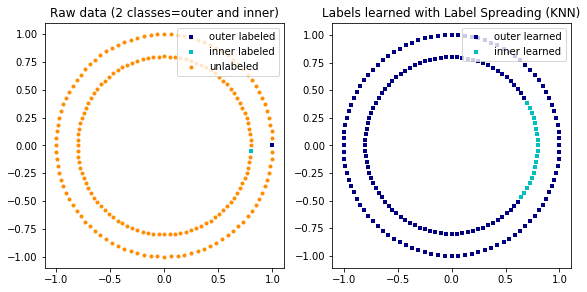

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_circles

# generate ring with inner box
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.)
labels[0] = outer
labels[-1] = inner

# #############################################################################
# Learn with LabelSpreading
label_spread = label_propagation.LabelSpreading(kernel='knn', alpha=0.1)
label_spread.fit(X, labels)

plotit(label_spread,X)

### Example 

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html

C:\Users\nimda\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Accuracy: 0.8883131836499712
Confusion matrix
 [[174   0   0   0   1   0   0   0   0   0]
 [  0 166   0   0   0   0   0   0   0   7]
 [ 48   9  97   1   0   0   0   0  20   0]
 [  0   0   1 163   0   2   0   0   0  13]
 [  0   0   0   0 171   0   0   2   0   0]
 [  0   0   0   3   0 164   3   0   0   5]
 [  0   0   0   0   0   0 171   0   0   0]
 [  9   0   0   0   1   0   0 163   1   0]
 [  0  34   0   1   1   1  21   2 109   0]
 [  0   0   0   1   1   0   0   0   6 165]]
Instances in CM: 1737
Best


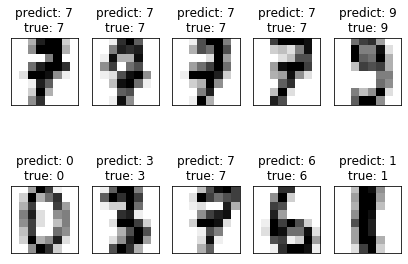

Worst


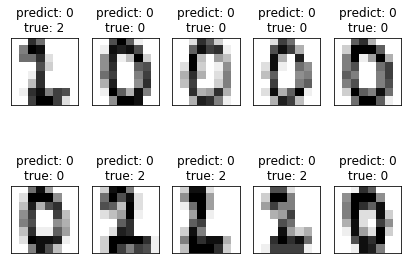

In [6]:
# Modified from : Clay Woolam <clay@woolam.org>
# License: BSD

import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)
X = digits.data[indices[:]]
y = digits.target[indices[:]]
images = digits.images[indices[:]]

n_total_samples = len(y)

# only this many images are labelled
n_labeled_points = 60

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

y_train = np.copy(y)
y_train[unlabeled_set] = -1

lp_model = label_propagation.LabelSpreading(kernel='knn',max_iter=20)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

print("Accuracy:", accuracy_score(true_labels, predicted_labels))
print("Confusion matrix\n", cm)
print("Instances in CM:", np.sum(cm))


def plotit(uncertainty_index,images):
    # Plot
    f = plt.figure(figsize=(7, 5))
    for index, image_index in enumerate(uncertainty_index):
        image = images[image_index]

        sub = f.add_subplot(2, 5, index + 1)
        sub.imshow(image, cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        sub.set_title('predict: %i\ntrue: %i' % (
            lp_model.transduction_[image_index], y[image_index]))
    plt.show()

# Calculate uncertainty for each
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# Plot best ones
best = np.argsort(pred_entropies)[:10]
print("Best")
plotit(best,images)

# Plot worst ones
worst = np.argsort(pred_entropies)[-10:]
print("Worst")
plotit(worst,images)
